In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('data\Original_data_with_more_rows.csv')

<>:1: SyntaxWarning: invalid escape sequence '\O'
<>:1: SyntaxWarning: invalid escape sequence '\O'
C:\Users\Ansaar\AppData\Local\Temp\ipykernel_7624\3965912340.py:1: SyntaxWarning: invalid escape sequence '\O'
  df = pd.read_csv('data\Original_data_with_more_rows.csv')


In [3]:
df.head(5)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail(5)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
30636,995,male,group C,some high school,standard,none,56,47,51
30637,996,male,group E,associate's degree,free/reduced,none,74,75,72
30638,997,male,group C,some college,standard,none,36,29,27
30639,998,male,group A,some high school,free/reduced,completed,43,34,39
30640,999,female,group D,associate's degree,standard,none,52,68,66


In [5]:
df.shape

(30641, 9)

In [6]:
df.isnull().sum()

Unnamed: 0      0
Gender          0
EthnicGroup     0
ParentEduc      0
LunchType       0
TestPrep        0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

In [8]:
df['AverageScore'] = df[['MathScore', 'ReadingScore', 'WritingScore']].mean(axis=1)

In [9]:
categorical_col = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep']
label_encoders = {}

for cols in categorical_col:
    le = LabelEncoder()
    df[cols] = le.fit_transform(df[cols])
    label_encoders[cols] = le

In [12]:
feature = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep']
X = df[feature]
y = df['AverageScore']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
predictions = model.predict(X_test)

In [16]:
root_mean = np.sqrt(mean_squared_error(y_test, predictions))

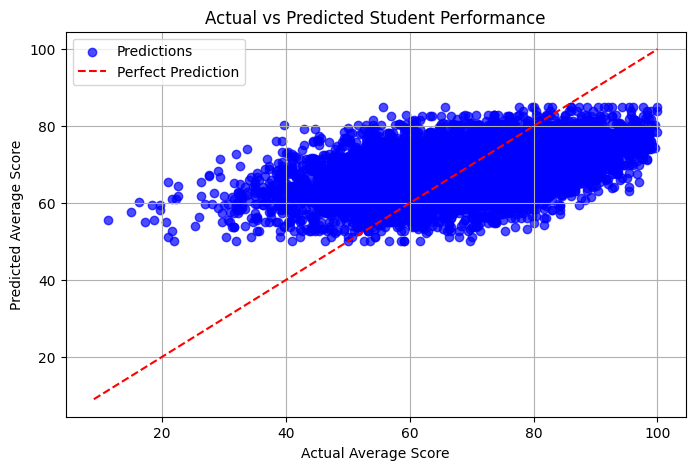

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, predictions, alpha=0.7, color='blue', label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Average Score')
plt.ylabel('Predicted Average Score')
plt.title('Actual vs Predicted Student Performance')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
parent_educ_map = label_encoders['ParentEduc'].inverse_transform(sorted(df['ParentEduc'].unique()))
avg_score_by_edu = df.groupby('ParentEduc')['AverageScore'].mean().sort_index()

C:\Users\Ansaar\AppData\Local\Temp\ipykernel_7624\2463570969.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=parent_educ_map, y=avg_score_by_edu.values, palette='viridis')


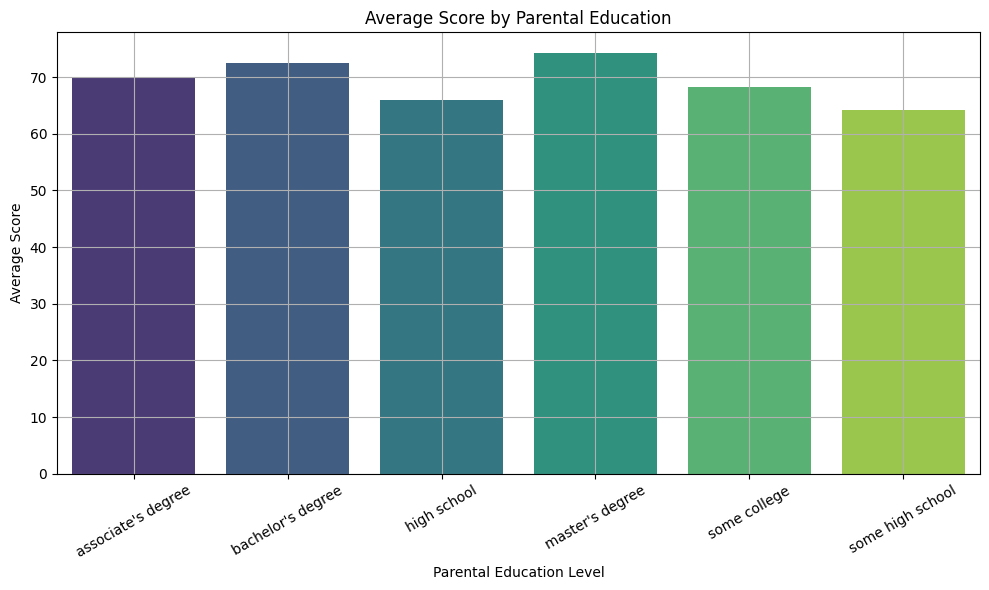

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=parent_educ_map, y=avg_score_by_edu.values, palette='viridis')
plt.title('Average Score by Parental Education')
plt.xlabel('Parental Education Level')
plt.ylabel('Average Score')
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()

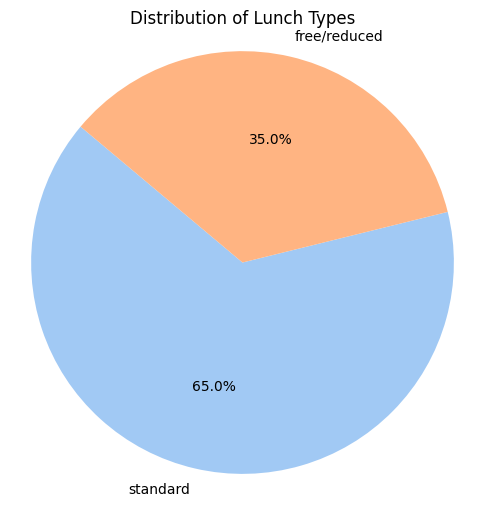

In [20]:
lunch_labels = label_encoders['LunchType'].inverse_transform(df['LunchType'])
lunch_counts = pd.Series(lunch_labels).value_counts()

plt.figure(figsize=(6, 6))
plt.pie(lunch_counts, labels=lunch_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Lunch Types')
plt.axis('equal')  # Ensures pie is a circle
plt.show()

C:\Users\Ansaar\AppData\Local\Temp\ipykernel_7624\3620364807.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_score_by_gender.index, y=avg_score_by_gender.values, palette='coolwarm')


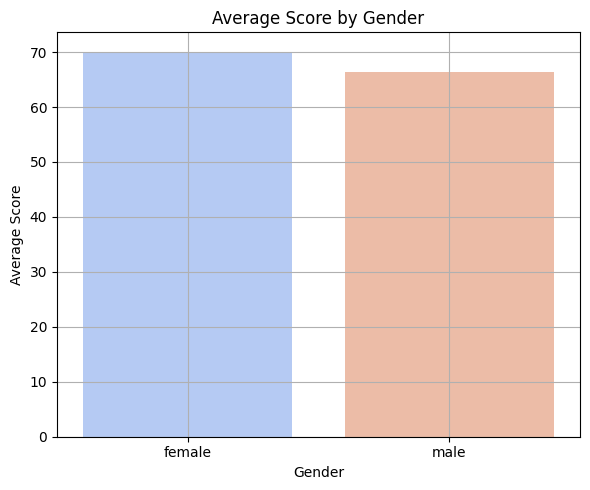

In [23]:
# Gender-wise Average Score
gender_labels = label_encoders['Gender'].inverse_transform(df['Gender'])
df['Gender_Label'] = gender_labels
avg_score_by_gender = df.groupby('Gender_Label')['AverageScore'].mean()

plt.figure(figsize=(6, 5))
sns.barplot(x=avg_score_by_gender.index, y=avg_score_by_gender.values, palette='coolwarm')
plt.title('Average Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Ansaar\AppData\Local\Temp\ipykernel_7624\4258780341.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_score_by_testprep.index, y=avg_score_by_testprep.values, palette='Set2')


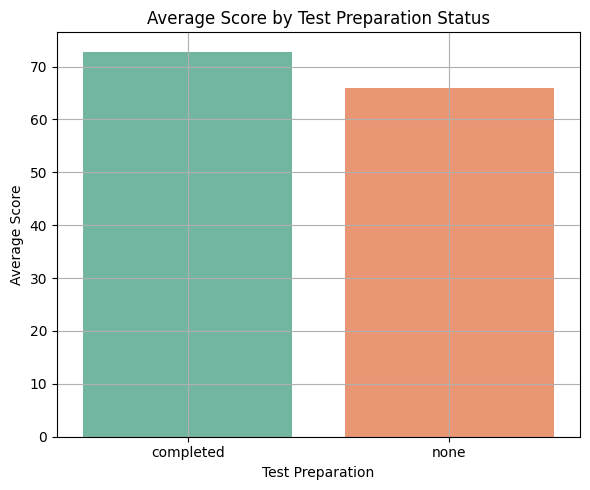

In [24]:
testprep_labels = label_encoders['TestPrep'].inverse_transform(df['TestPrep'])
df['TestPrep_Label'] = testprep_labels
avg_score_by_testprep = df.groupby('TestPrep_Label')['AverageScore'].mean()

plt.figure(figsize=(6, 5))
sns.barplot(x=avg_score_by_testprep.index, y=avg_score_by_testprep.values, palette='Set2')
plt.title('Average Score by Test Preparation Status')
plt.xlabel('Test Preparation')
plt.ylabel('Average Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
print("\nModel Insights (Layman's Terms):")
print("----------------------------------")
print("1. Students who complete test preparation generally perform better.")
print("2. Students with standard lunch types tend to score higher.")
print("3. Higher parental education levels are linked to better scores.")
print("4. The model learns from patterns in background data to estimate scores.")
print(f"5. On average, the model is off by about {root_mean:.2f} points.")


Model Insights (Layman's Terms):
----------------------------------
1. Students who complete test preparation generally perform better.
2. Students with standard lunch types tend to score higher.
3. Higher parental education levels are linked to better scores.
4. The model learns from patterns in background data to estimate scores.
5. On average, the model is off by about 12.70 points.
